Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Могу предложить обратить внимание на вот этот теоритический курс лекци: https://www.youtube.com/watch?v=SZkrxWhI5qM&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что правильно использованы train/valid/test наборы.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Я оставил несколько советов, надеюсь, что они будут учтены в будущих проектах.
* Тебе удалось добиться очень хорошего качества, поздравляю!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Удачи в дальнейшем обучении и следующих работах!

In [1]:
# Пожалуйста, закомментируйте эту ячейку перед отправкой
#%pip install -q -r requirements-ml.txt

In [2]:
# Пожалуйста, не изменяйте эту ячейку! Перед отправкой её комментировать не надо!
%pip install scikit-learn==0.22.1

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.0 MB 2.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Рекомендация тарифов

## Содержание
### Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

### Цель исследования
Построить модель для задачи классификации с максимально большим значением accuracy, которая выберет подходящий тариф.

### Ход исследования
1. Изучить исходные данные
2. Разделить исходные данные на выборки
3. Исследовать качество разных моделей
4. Проверить качество модели на тестовой выборке

## Откройте и изучите файл

Импортирую все необходимые библиотеки и модули.

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
import warnings
warnings.filterwarnings("ignore") 

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

Методом read_csv() создам датафрейм из данных формата csv, дополнительные параметры не нужны, так как в файле csv стандартный разделитель и положение заголовков.

In [5]:
try:
    data = pd.read_csv('users_behavior.csv')
except FileNotFoundError as e:
    print(e)
    data = pd.read_csv('/datasets/users_behavior.csv')

[Errno 2] File b'users_behavior.csv' does not exist: b'users_behavior.csv'


In [6]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

Предобработка данных не понадобится — я её уже сделала в предыдущем проекте с этими же данными.

Для того, чтобы исследовать данные на мультиколлинеарность, выведу матрицу корреляции импортированным методом scatter_matrix() между всеми столбцами, кроме "is_ultra", так как этот столбец с категориальными переменными. Мультиколлинеарность — корреляция независимых переменных, которая затрудняет оценку и анализ общего результата. В машинном обучении мультиколлинеарность может стать причиной переобучаемости модели, что приведет к неверному результату.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fe9f1a650>,
      dtype=object)

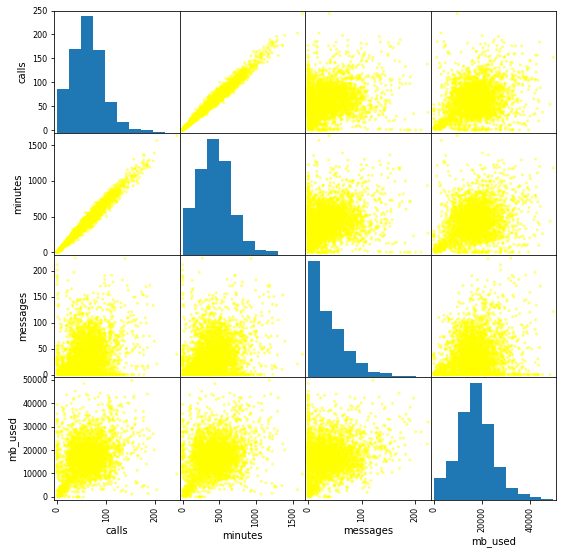

In [7]:
scatter_matrix(data.drop(['is_ultra'],axis =1), figsize=(9, 9), color = 'yellow') 

In [8]:
'Корреляция столбцов calls и minutes:{0}'.format(data['calls'].corr(data['minutes']))

'Корреляция столбцов calls и minutes:0.9820832355742293'

На мартице видна высокая корреляция между значениями столбцов calls и minutes, коэфициент корреляции показал значение 0.98, что очень близко к 1 - совершенной положительной корреляции. Две переменных коллинеарны, когда они находятся между собой в линейной зависимости, если коэффициент корреляции более 0,7. Чтобы избавиться от мультиколлинарности, необходимо исключить из модели один из факторов. В дальнейших шагах проекта необходимо будет провести эксперимент по удалению одного из признаков и оценке качества моделей.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Радует, что распределения были визуализированы!
</div>

## Исследуйте модели

Выделю целевой признак из датафрейма в переменную target, остальные признаки оставлю в переменной features. Целевой признак (признак, который нужно предсказать)- is_ultra.

In [9]:
target_all = data['is_ultra']
features_all = data.drop(['is_ultra'], axis=1)

Необходимо разделить исходные данные на обучающую, валидационную и тестовую выборки. Значит, данные нужно разбить на три части. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбивают в соотношении 3:1:1. Сперва разделю исходные данные в отношении 3:2, далее получившиеся данные в отношении 1:1.

In [10]:
features_train_all, features_valid_test_all,target_train_all, target_valid_test_all = train_test_split(features_all, target_all, test_size = 0.4, random_state = 12345)

In [11]:
features_valid_all, features_test_all, target_valid_all, target_test_all = train_test_split(features_valid_test_all, target_valid_test_all, test_size=0.5, random_state = 12345) 

Выведу размер выделенных выборок, чтобы убедиться что все корректно расситалось.

In [17]:
print('размер features_train_all',features_train_all.shape)
print('размер features_valid_all',features_valid_all.shape)
print('размер features_test_all',features_test_all.shape)

размер features_train_all (1928, 4)
размер features_valid_all (643, 4)
размер features_test_all (643, 4)


Лучшую модель буду выбирать из: модель дерева решений, модель случайного леса, модель логистической регресии.

<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано правильно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно, чтобы размеры полученных наборов были напечатаны. Иногда, это помогает избежать ошибок.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Добавила размеры.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

### Дерево решений

In [ ]:
best_model = None
best_result = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions) 
    if result > best_result:
        best_model = model
        best_result = result
        
print("Accuracy лучшей модели дерева решений:", best_result, best_model)

<div class="alert alert-block alert-success">
<b>Успех:</b> Подбор парамтеров был сделан верно.
</div>

### Случайный лес

In [ ]:
best_model = None
best_result = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train,target_train) 
        result = model.score(features_valid, target_valid) 
        if result > best_result:
            best_model = model
            best_result = result

print("Accuracy лучшей модели случайного леса:", best_result, best_model)

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что в данном случае настраивается сразу несколько параметров!
</div>

### Логистическая регрессия

In [ ]:
model = LogisticRegression(random_state = 12345)
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid)

print("Accuracy модели логистической регрессии на валидационной выборке:", result)

**Вывод:** Таким образом, лучший результат обучения у модели случайного леса с гиперпараметрами max_depth=8, n_estimators=40.
Теперь исследую, увеличится ли accuracy модели, если поочередно убрать столбцы, которые имеют высокую корреляцию (calls и minutes).

In [ ]:
target = data['is_ultra']
features = data.drop(['is_ultra','calls'], axis=1)

In [ ]:
features_train, features_valid_test,target_train, target_valid_test = train_test_split(features, target, test_size = 0.4, random_state = 12345)

In [ ]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state = 12345) 

### Дерево решений (без calls)

In [ ]:
best_model = None
best_result = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions) 
    if result > best_result:
        best_model = model
        best_result = result
        
print("Accuracy лучшей модели дерева решений:", best_result, best_model)

### Случайный лес (без calls)

In [ ]:
best_model = None
best_result = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train,target_train) 
        result = model.score(features_valid, target_valid) 
        if result > best_result:
            best_model = model
            best_result = result

print("Accuracy лучшей модели случайного леса:", best_result, best_model)

### Логистическая регрессия (без calls)

In [ ]:
model = LogisticRegression(random_state = 12345)
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid)

print("Accuracy модели логистической регрессии на валидационной выборке:", result)

**Вывод:** Ни одна из моделей не показала результат лучше, чем случайный лес с исходными данными без исключения признака calls. Проверю то же самое с исключением признака minutes.

In [ ]:
target = data['is_ultra']
features = data.drop(['is_ultra','minutes'], axis=1)

In [ ]:
features_train, features_valid_test,target_train, target_valid_test = train_test_split(features, target, test_size = 0.4, random_state = 12345)

In [ ]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state = 12345) 

### Дерево решений (без minutes)

In [ ]:
best_model = None
best_result = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions) 
    if result > best_result:
        best_model = model
        best_result = result
        
print("Accuracy лучшей модели дерева решений:", best_result, best_model)

### Случайный лес (без minutes)

In [ ]:
best_model = None
best_result = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train,target_train) 
        result = model.score(features_valid, target_valid) 
        if result > best_result:
            best_model = model
            best_result = result

print("Accuracy лучшей модели случайного леса:", best_result, best_model)

### Логистическая регрессия (без minutes)

In [ ]:
model = LogisticRegression(random_state = 12345)
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid)

print("Accuracy модели логистической регрессии на валидационной выборке:", result)

**Вывод:** Ни одна из моделей не показала результат лучше, чем случайный лес с исходными данными без исключения признака minutes или calls. Проверять на тестовой выборке я буду модель случайного леса с гиперпараметрами n_estimators=40, max_depth=8.

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовала разные модели и поэкспериментировала с удалением зависимых признаков!
</div>

## Проверьте модель на тестовой выборке

In [19]:
model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=8) 
model.fit(features_train_all,target_train_all)
result = model.score(features_test_all, target_test_all) 

print("Accuracy модели случайного леса для тестовой выборки:", result)

Accuracy модели случайного леса для тестовой выборки: 0.7962674961119751


<div class="alert alert-block alert-success">
<b>Успех:</b> Тетсирование было сделано абсолютно верно!
</div>

## Вывод
Для построения модели классификации, которая выберет подходящий тариф для клиента из исходных данных было составлено три выборки - обучающая, валидационная и тестовая в отношении 3:1:1. Для проверки на мультиколлиниарность была построена матрица корреляции, которая показала что корреляция между признаками calls и minutes стремится к абсолютной положительной корреляции. Наилучший результат accuracy для исходных данных показала модель Случайного леса с гиперпарамтерами n_estimators=40, max_depth=8. Тестовая выборка показала результат accuracy 0.796. 

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта!
</div>

## (бонус) Проверьте модели на адекватность

<div class="alert alert-block alert-info">
<b>Совет: </b> Под проверкой на адекватность обычно понимают сравнение с какой-то глупой моделью (например, константной, то есть той, которая всегда выдает одно число). Подумай, какие числа имеет смысл предсказывать в этой задаче, посчитай точность для каждого из этих чисел. Попробуй объяснить полученные результаты.
    <br> Проверку на адекватность лучше всего реализовывать с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html"> DummyClassifier </a>. 
    <br> Точность правильной константной модели должна быть равна доли бОльшего класса.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
